In [1]:
#[코드 2-1] 텍스트 정형화 예시(TF방법)
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

documents = ['the sun is shinning',
           'the weather is sweet',
          'the sun is shinning and the weather is sweet']

vectorizer = CountVectorizer()
dtm = vectorizer.fit_transform(documents)
tf = pd.DataFrame(dtm.toarray(), columns=vectorizer.get_feature_names_out())
tf

,and,is,shinning,sun,sweet,the,weather
0,0,1,1,1,0,1,0
1,0,1,0,0,1,1,1
2,1,2,1,1,1,2,1


In [3]:
#[코드 2-2] 텍스트 정형화 예시(전체빈도)
df = tf.astype(bool).sum(axis = 0)
print(df)
df.to_excel("tf_result.xlsx")

and         1
is          3
shinning    2
sun         2
sweet       2
the         3
weather     2
dtype: int64


In [4]:
#[코드 2-3] 텍스트 정형화 예시(TF-IDF)
D = len(tf)
idf = np.log((D) / (df))
tfidf = tf * idf
tfidf = tfidf / np.linalg.norm(tfidf, axis = 1, keepdims = True)
tfidf


,and,is,shinning,sun,sweet,the,weather
0,0.000000,0.0,0.707107,0.707107,0.000000,0.0,0.000000
1,0.000000,0.0,0.000000,0.000000,0.707107,0.0,0.707107
2,0.804557,0.0,0.296938,0.296938,0.296938,0.0,0.296938


##텍스트마이닝의 기초 실전 예제

In [5]:
#[코드 2-4] 텍스트 자료 불러오는 코드
import pandas as pd
data = pd.read_excel("news.xlsx")
contents = data["키워드"]
print(contents)

0       한국,금메달,최가온,루지,쇼트트랙,김하윤,스노보드,강원,평창,주재희,동메달,5개,중...
1       중국,주재희,강원,베이징,대한빙상경기연맹,isu,베이징동계올림픽,한국,1위,장신저,...
2       정선,스노보드,금메달,이상호,국민고향정선,fis,밀라노,슈퍼스타,평행회전,불가리아,...
3       사우디아라비아,pif,포뮬라,익스트림,잉글랜드,국제자동차연맹,아각,알레한드로,경주,...
4       살라,이집트,아프리카,햄스트링,잉글랜드,영국,리버풀,카보,2차,3차,가나,베르데,한...
                              ...                        
4143    장애인,항저우,중국,한국,개회식,선수단,오스만투스,아시안게임,개막식,장애인아시아경기...
4144    대공원역,삼성,도시철도,라이온즈,대구교통공사,코로나19,하위권,한동안,라이온즈파크,...
4145    참가자,춘천,반환점,급수대,풀코스,조선일보,공지천교,강원체고,좌회전,공지천,의암호,...
4146    잉글랜드,맨유,보비,찰턴,레전드,컵대회,249골,정규리그,영국,데블스,49골,맨체스...
4147    최경주,미국,비거리,pga,완력기,챔피언스투어,pga투어,코리안,113마일,스트레칭...
Name: 키워드, Length: 4148, dtype: object


In [6]:
#[코드 2-5] 실습자료 전처리 코드
keyword = []
for a in contents:
  words = a.split(",")
  while "스포츠" in words:
    words.remove("스포츠")
  keyword.append(words)
print(keyword)

[['한국', '금메달', '최가온', '루지', '쇼트트랙', '김하윤', '스노보드', '강원', '평창', '주재희', '동메달', '5개', '중국', '김유성', '미국', '브라질', '아이스하키', '선수들', '클로이', '청소년올림픽', '시상대', '김소윤'], ['중국', '주재희', '강원', '베이징', '대한빙상경기연맹', 'isu', '베이징동계올림픽', '한국', '1위', '장신저', '금메달', '닮은꼴', '동계청소년올림픽', '청소년올림픽', '기대주', '캐피털', '강릉', '결승선', '관계자', '국제빙상경기연맹', '베이징올림픽과', '1000m'], ['정선', '스노보드', '금메달', '이상호', '국민고향정선', 'fis', '밀라노', '슈퍼스타', '평행회전', '불가리아', '국제스키연맹', '안드레아스', '프롬메거', '한국', '성화점', '성화점화자', '맹활약', '스노보더', '동계올림픽', '결승전', '팜포로보', '강원', '은메달', '종합우승'], ['사우디아라비아', 'pif', '포뮬라', '익스트림', '잉글랜드', '국제자동차연맹', '아각', '알레한드로', '경주', '모터보트레이싱', '전기차', '포뮬라e', '익스트림e', '한국', '뉴캐슬', '사우디', '한국시간', '미국프로골프', 'f1', 'e1모터보트레이싱', '미국', '프리미어리그', '설립자', '포뮬러1', '오프로드', '자동차', '전기자동차경주', 'bbc', 'pga'], ['살라', '이집트', '아프리카', '햄스트링', '잉글랜드', '영국', '리버풀', '카보', '2차', '3차', '가나', '베르데', '한국', '2경기', '압바스', '라미', '3무', '한국시간', '브렌트퍼드'], ['경기장', '강원', '동계청소년올림픽', '조직위', '정상빈', '노르딕', '김중용', '관계자', '촬영기자', '황태령', '정선', '최소화', '평창', '바이애슬론', '홈

In [7]:
#[코드 2-6] TF를 활용한 주요단어 산출
import nltk
word = [text for texts in keyword for text in texts] #하나의 리스트에 넣기##
text = nltk.Text(word)
print(len(text.tokens)) # 문서에서 나온 단어수
print(len(set(text.tokens))) # 겹치지 않는 단어수
print(text.vocab().most_common(8)) # 가장 빈번히 나온 token 나열
df = pd.DataFrame()
keys, values = zip(*[(key, value) for key, value in text.vocab().items()])
df["단어"] = keys
df["빈도수"] = values
df.to_excel("TF.xlsx")

85781
19769
[('한국', 1423), ('미국', 862), ('선수들', 851), ('중국', 590), ('서울', 561), ('아시아', 460), ('일본', 441), ('금메달', 429)]


In [8]:
#[코드 2-7] TF-IDF를 활용한 주요단어 산출
from gensim import corpora, models
dictionary_ko = corpora.Dictionary(keyword)
tf_ko = [dictionary_ko.doc2bow(text) for text in keyword]  #tf방법으로 데이터 정형화한 코드
tfidf_model = models.TfidfModel(tf_ko)
tfidf_corpus = tfidf_model[tf_ko]  #tf-idf방법으로 데이터 정형화한 코드
tfidf_list = []
for doc in tfidf_corpus:
  tfidf_dict = {dictionary_ko[word_id]: tfidf_value for word_id, tfidf_value in doc}
  tfidf_list.append(tfidf_dict)

df = pd.DataFrame(tfidf_list)
key, value = zip(*[(a, round(df[a].sum(), 5)) for a in df.columns.tolist()])
df = pd.DataFrame()
df["단어"] = key
df["tf-idf"] = value
df.to_excel('tfidf.xlsx', index=False)

##텍스트 마이닝의 시각화 실전 예제

In [9]:
#[코드 2-8] 한글 글꼴설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (5,670 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123598 files and dire

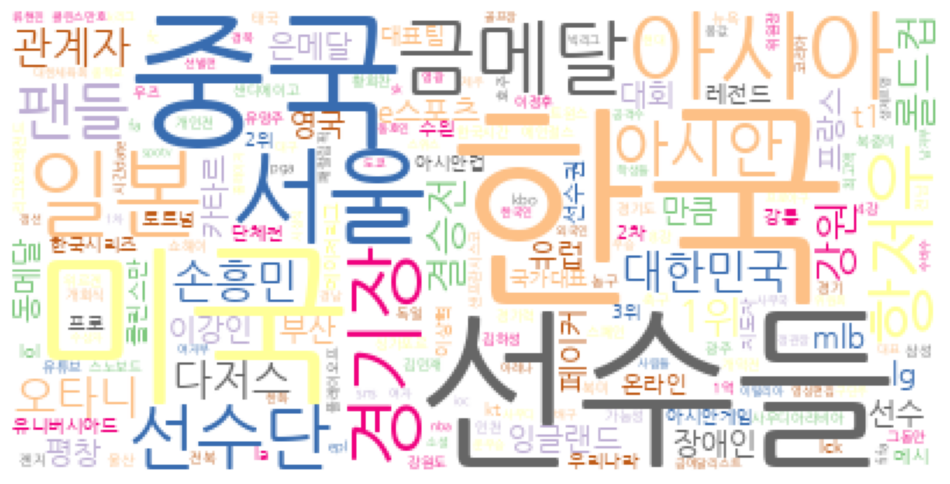

In [10]:
#[코드 2-9] 워드클라우드를 활용한 텍스트 시각화
from wordcloud import WordCloud
import matplotlib.pyplot as plt
data = text.vocab().most_common(200)
tmp_data = dict(data)
wordcloud = WordCloud(font_path='/user/share/fonts/truetype/nanum/NanumGothic.ttf',
                      colormap = 'Accent',
                      background_color='white').generate_from_frequencies(tmp_data)
plt.figure(figsize=(12,12))
plt.axis("off")
plt.imshow(wordcloud)

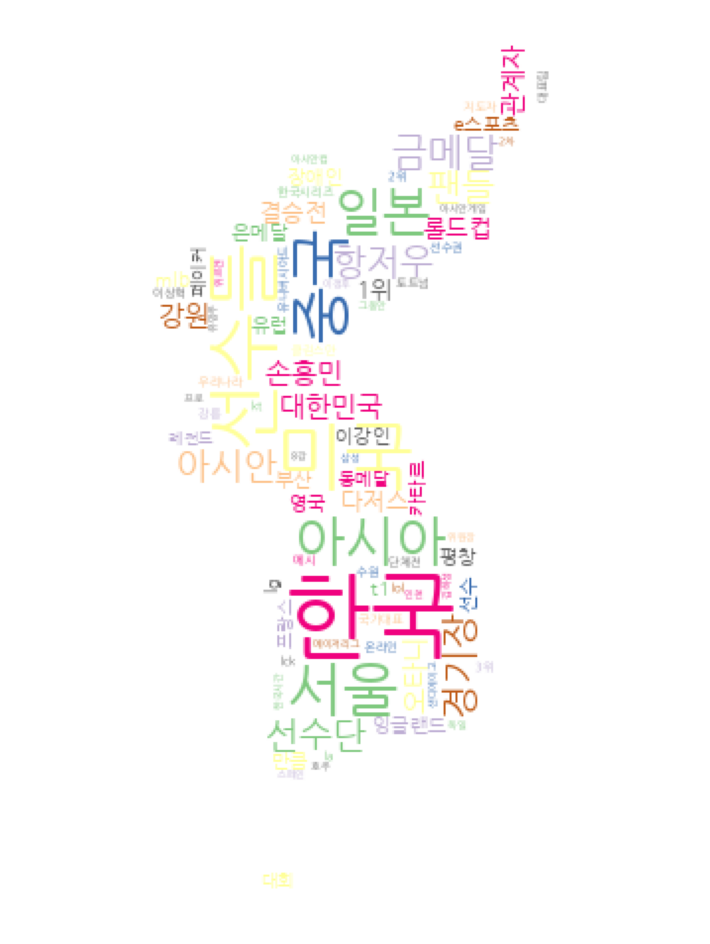

In [12]:
#[코드 2-10] 워드클라우드 모양 변경 코드
import numpy as np
from wordcloud import WordCloud
from PIL import Image
import matplotlib.pyplot as plt
img = np.array(Image.open('/content/한반도.jpg')) #사진파일명
wordcloud = WordCloud(mask = img,
                      font_path='/user/share/fonts/truetype/nanum/NanumGothic.ttf',
                      colormap = 'Accent',
                      background_color='white').generate_from_frequencies(tmp_data)
plt.figure(figsize=(12,12))
plt.axis("off")
plt.imshow(wordcloud)